<a href="https://colab.research.google.com/github/michaelwnau/ai_academy_notebooks/blob/main/WKS_5_nau_tues_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 5 (Student)**

In this workshop, you'll looking at evaluation metrics and hyperparameter turning.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0) Loading Data and Libraries

In [32]:
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics

# Add seaborn 
import seaborn as sns

# we're using the Diabetes dataset from sklearn.datasets
from sklearn import datasets
# Remember you have to run this cell block before continuing!

# set a seed for reproducibility
random_seed = 25
np.random.seed(random_seed)

# 1) Evaluation Metrics

## 1.1) Meet the Metrics (Follow)

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# This is a dummy dataset that contains 500 positive and 500 negative samples
X,Y = make_classification(n_samples=1000,n_features=4,flip_y=0,random_state=random_seed)

test_data_fraction = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_data_fraction,  random_state=random_seed)

In [7]:
from sklearn.tree import DecisionTreeClassifier
Y_test_predicted = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
#sum(Y)/len(Y)

In [8]:
# BEGIN SOLUTION
print(f'Accuracy: {sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)}')
print(f'Precision Macro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="macro")}')
print(f'Recall Macro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="macro")}')
print(f'F1 Macro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="macro") }')

Accuracy: 0.92
Precision Macro: 0.9184393588063313
Recall Macro: 0.9201336167628302
F1 Macro: 0.9191919191919192


In [9]:
# Since the datset is balanced in term of class distribution, all of the micro scores are the same as the accuracy
print(f'Precision Micro: {sklearn.metrics.precision_score(Y_test, Y_test_predicted, average="micro")}')
print(f'Recall Micro: {sklearn.metrics.recall_score(Y_test, Y_test_predicted, average="micro")}')
print(f'F1 Micro: { sklearn.metrics.f1_score(Y_test, Y_test_predicted, average="micro") }')

Precision Micro: 0.92
Recall Micro: 0.92
F1 Micro: 0.92


Sklearn also has a [built in function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that will give a handy summary of all the popular classification metrics. You can use this for the later questions.

The first few values on the first column (before accuracy, macro avg, etc.) are the class values.

In [10]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_test_predicted,digits=4))

              precision    recall  f1-score   support

           0     0.9358    0.9189    0.9273       111
           1     0.9011    0.9213    0.9111        89

    accuracy                         0.9200       200
   macro avg     0.9184    0.9201    0.9192       200
weighted avg     0.9203    0.9200    0.9201       200



In [12]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
Y_test_predicted = KNeighborsClassifier(n_neighbors=3).fit(X=X_train, y=Y_train).predict(X_test)
print("KNN Classifer")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifer
              precision    recall  f1-score   support

           0     0.9907    0.9550    0.9725       111
           1     0.9462    0.9888    0.9670        89

    accuracy                         0.9700       200
   macro avg     0.9684    0.9719    0.9698       200
weighted avg     0.9709    0.9700    0.9701       200



In [13]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
Y_test_predicted = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

           0     0.9537    0.9279    0.9406       111
           1     0.9130    0.9438    0.9282        89

    accuracy                         0.9350       200
   macro avg     0.9334    0.9359    0.9344       200
weighted avg     0.9356    0.9350    0.9351       200



In [14]:
import warnings
warnings.filterwarnings('ignore')

# Dummy Classifier (Picks the majority class. Every time.)
from sklearn.dummy import DummyClassifier
Y_test_predicted = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X=X_train, y=Y_train).predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       111
           1     0.4450    1.0000    0.6159        89

    accuracy                         0.4450       200
   macro avg     0.2225    0.5000    0.3080       200
weighted avg     0.1980    0.4450    0.2741       200



## 1.2) Imbalanced data (Group)

In [15]:
# Load the data
# Read the breast cancer dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [16]:
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's take a look at the ratio of class values in the dataset.

In [17]:
bc_data["target"].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

As we can see, it's around a 60/40 split. What effect do you think this will have on the various evaluation metrics?

**Discuss Here**

Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [18]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed).fit(X_train, Y_train)
Y_test_predicted = decision_tree.predict(X_test)
print("Decision Tree Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Decision Tree Classifier
              precision    recall  f1-score   support

         0.0     0.9167    0.8462    0.8800        39
         1.0     0.9231    0.9600    0.9412        75

    accuracy                         0.9211       114
   macro avg     0.9199    0.9031    0.9106       114
weighted avg     0.9209    0.9211    0.9202       114



In [19]:
# K-Nearest Neighbor Classifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
Y_test_predicted = knn.predict(X_test)
print("KNN Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

KNN Classifier
              precision    recall  f1-score   support

         0.0     1.0000    0.8718    0.9315        39
         1.0     0.9375    1.0000    0.9677        75

    accuracy                         0.9561       114
   macro avg     0.9688    0.9359    0.9496       114
weighted avg     0.9589    0.9561    0.9553       114



In [20]:
# AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X_train, Y_train)
Y_test_predicted = ada.predict(X_test)
print("Adaboost Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Adaboost Classifier
              precision    recall  f1-score   support

         0.0     0.9714    0.8718    0.9189        39
         1.0     0.9367    0.9867    0.9610        75

    accuracy                         0.9474       114
   macro avg     0.9541    0.9292    0.9400       114
weighted avg     0.9486    0.9474    0.9466       114



In [21]:
# Dummy Classifier
dummy = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X_train, Y_train)
Y_test_predicted = dummy.predict(X_test)
print("Dummy Classifier")
print(classification_report(Y_test,Y_test_predicted,digits=4))

Dummy Classifier
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        39
         1.0     0.6579    1.0000    0.7937        75

    accuracy                         0.6579       114
   macro avg     0.3289    0.5000    0.3968       114
weighted avg     0.4328    0.6579    0.5221       114



In terms of evaluation metrics, how did each model perform? Discuss

**Discuss**

## 1.3) Multiclass Data (Group)

Now, we'll be looking at the wine dataset.

In [22]:
# Read the iris dataset and translate to pandas dataframe # THIS SHOULD SAY: # Read the wine dataset ...
wine_sk = datasets.load_wine()
# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data'], wine_sk['target']],columns= wine_sk['feature_names'] + ['target'])

In [23]:
from sklearn.model_selection import train_test_split
# The fraction of data that will be test data
test_data_fraction = 0.1

wine_features = wine_data.iloc[:,0:-1]
wine_labels = wine_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(wine_features, wine_labels, test_size=test_data_fraction,  random_state=random_seed)

Let's check the distribution of the dataset

In [24]:
wine_data["target"].value_counts()

1.0    71
0.0    59
2.0    48
Name: target, dtype: int64

The [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) is useful for getting a broad overview of how your classifier handled certain classes.

In [25]:
from sklearn.metrics import confusion_matrix

# Now create a confusion matrix


Now run the evaluation metrics as like above for Decision Trees, KNN, Adaboost, and the Dummy Classifier.

In [26]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(criterion="gini", random_state=random_seed).fit(X_train, Y_train)
Y_test_predicted_dt = dt_classifier.predict(X_test)
cm_dt = confusion_matrix(Y_test, Y_test_predicted_dt)

In [27]:
# K-Nearest Neighbor Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
Y_test_predicted_knn = knn_classifier.predict(X_test)
cm_knn = confusion_matrix(Y_test, Y_test_predicted_knn)

In [28]:
# AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=random_seed).fit(X_train, Y_train)
Y_test_predicted_adaboost = adaboost_classifier.predict(X_test)
cm_adaboost = confusion_matrix(Y_test, Y_test_predicted_adaboost)

In [30]:
# Dummy Classifier
dummy_classifier = DummyClassifier(strategy="most_frequent", random_state=random_seed).fit(X_train, Y_train)
Y_test_predicted_dummy = dummy_classifier.predict(X_test)
cm_dummy = confusion_matrix(Y_test, Y_test_predicted_dummy)

In [33]:
print("Confusion Matrix for Decision Tree Classifier:")
print(cm_dt)
print("\nConfusion Matrix for K-Nearest Neighbor Classifier:")
print(cm_knn)
print("\nConfusion Matrix for AdaBoost Classifier:")
print(cm_adaboost)
print("\nConfusion Matrix for Dummy Classifier:")
print(cm_dummy)


Confusion Matrix for Decision Tree Classifier:
[[5 1 0]
 [1 7 1]
 [0 0 3]]

Confusion Matrix for K-Nearest Neighbor Classifier:
[[4 1 1]
 [0 8 1]
 [0 1 2]]

Confusion Matrix for AdaBoost Classifier:
[[5 1 0]
 [0 9 0]
 [0 0 3]]

Confusion Matrix for Dummy Classifier:
[[0 6 0]
 [0 9 0]
 [0 3 0]]


In [35]:
# Let's make those confusion matrices look nicer:

def plot_confusion_matrix(cm, classifier_name, target_names, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=target_names, yticklabels=target_names)

    plt.title(title, fontsize=16)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Get target names from the wine_sk dataset
target_names = wine_sk.target_names


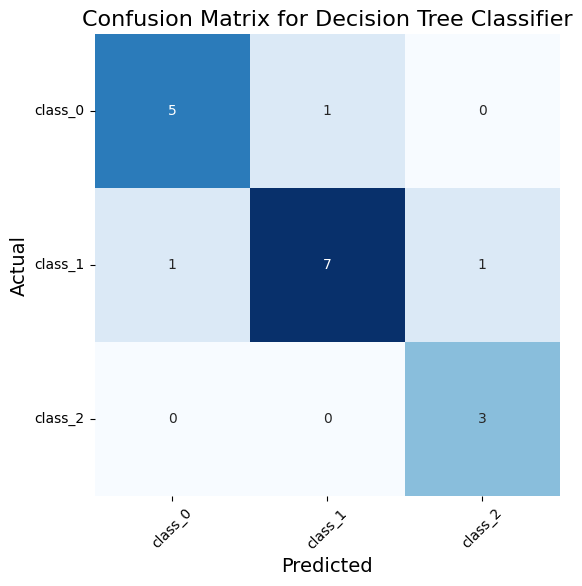

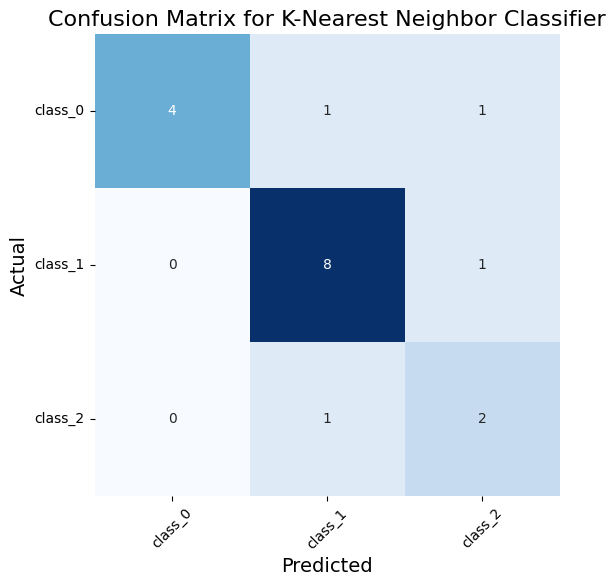

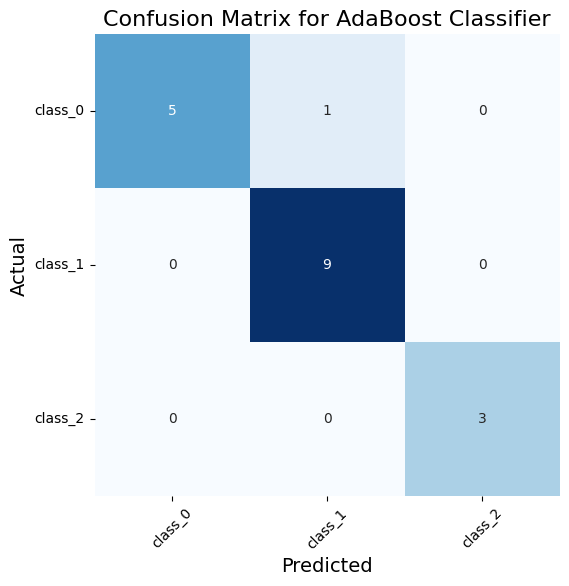

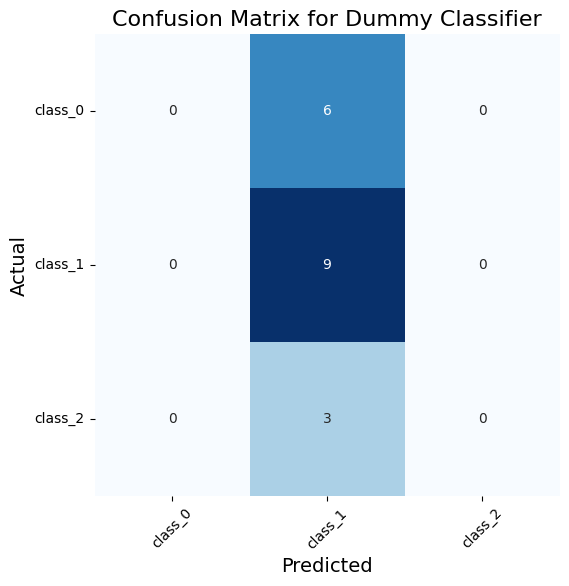

In [36]:
plot_confusion_matrix(cm_dt, "Decision Tree", target_names, title="Confusion Matrix for Decision Tree Classifier")
plot_confusion_matrix(cm_knn, "K-Nearest Neighbors", target_names, title="Confusion Matrix for K-Nearest Neighbor Classifier")
plot_confusion_matrix(cm_adaboost, "AdaBoost", target_names, title="Confusion Matrix for AdaBoost Classifier")
plot_confusion_matrix(cm_dummy, "Dummy", target_names, title="Confusion Matrix for Dummy Classifier")


In terms of evaluation metrics, how did each model perform? Discuss

Discuss here

# 2) Cross Validation and Hyperparmeter Tuning

## 2.1) Basic Cross Validation (Follow)

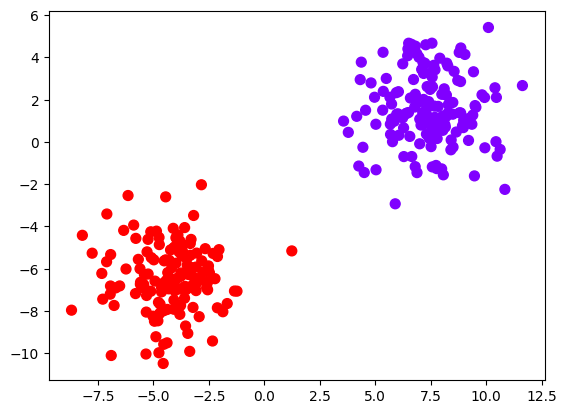

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Added this:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Add a synthetic dataset:
X, y = make_blobs(n_samples=300, centers=2, random_state=random_seed, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow');

In [54]:
# Initialize a k-fold splitter
kf = KFold(n_splits=3)

# Kf.split() allows you to iterate through the different folds
# "train_index" are the indices of the training data in that fold
# "test_index" are the indices of the testing data in that fold
print(len(X))
for train_index, test_index in kf.split(X):
    print("Train: ", train_index)
    print("Test: ", test_index)
    print("----")

300
Train:  [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299]
Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 

In [58]:
#----------------THIS IS THE ORIGINAL CELL-----------------------


# Kf.split() allows you to iterate though the different folds
# "train_index" are the indecies of the training data in that fold
# "test_index" are the indicies of the testing data in that fold
print(len(X_train))
for train_index, test_index in kf.split(X_train):
    print("Train: ", train_index)
    print("Test: ", test_index)
    print("----")

455
Train:  [152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223
 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277
 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 39

## 2.2) Hyperparameter Tuning with CV (Group)

We did some very basic HP Tuning last workshop. However, one of the main issues is that we did HP tuning by testing our HPs againt the test dataset. It's good practice not to touch your dataset at all until you've finished selecting your model completly. Therefore, in this exercise we'll be trying out different HPs by constructing validation sets from our training data.

The dataset we'll be using for this exercise is the breast cancer dataset, which is used to tell if a certain individal might have breast cancer or not.

In [59]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

bc_sk = datasets.load_breast_cancer()

# Make sure data is in the same range
bc_sk.data = MinMaxScaler().fit_transform(bc_sk.data)

# Note that the "target" attribute is species, represented as an integer
bc_data = pd.DataFrame(data= np.c_[bc_sk['data'], bc_sk['target']],columns= list(bc_sk['feature_names'])+['target'])
bc_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [62]:
# Formatting our data
test_data_fraction = 0.2
bc_features = bc_data.iloc[:,0:-1]
bc_labels = bc_data["target"]
X_train, X_test, Y_train, Y_test = train_test_split(bc_features, bc_labels, test_size=test_data_fraction,  random_state=random_seed)

In [64]:
def k_fold_accuracy(k, model, X_data, Y_data):
    
    # Init k-fold splitter
    kf = KFold(n_splits=k)
    scores = []
    
    #use kf.split to split the train data into train and validation data
    #iterate through all possible folds and fit the folded training data to the model
    #use the validation data to predict on the model
    #compute the accuracy score and append it to scores
    # Use kf.split to split the train data into train and validation data
    for train_index, val_index in kf.split(X_data):
        X_train_fold, X_val_fold = X_data.iloc[train_index], X_data.iloc[val_index]
        y_train_fold, y_val_fold = Y_data.iloc[train_index], Y_data.iloc[val_index]
        
        # Fit the folded training data to the model
        model.fit(X_train_fold, y_train_fold)
        
        # Use the validation data to predict on the model
        y_val_pred = model.predict(X_val_fold)
        
        # Compute the accuracy score and append it to scores
        fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
        scores.append(fold_accuracy)
    return scores

In [65]:
# Testing K-fold
k = 3
model = DecisionTreeClassifier(criterion = "gini", random_state=random_seed)
per_fold_acc = k_fold_accuracy(k, model, X_train, Y_train)
print(per_fold_acc)
np.mean(per_fold_acc)

[0.9539473684210527, 0.9605263157894737, 0.9205298013245033]


0.9450011618450098

There also exists a built in sklearn function for this, however it is import to know how to perform your own k-fold cross validation split if you want to implement a custom evaluation metric.

In [66]:
from sklearn import metrics
# We're using the trianing dataset here, but remember that CV will
# split that data into training and validation sets for each fold
# so we get an "unbiased" estimate of our test performance.
per_fold_acc = cross_val_score(model, X_train.values, Y_train.values, cv=KFold(n_splits=k), scoring='accuracy')
print(per_fold_acc)
np.mean(per_fold_acc)

[0.95394737 0.96052632 0.9205298 ]


0.9450011618450098

## 2.3 Tuning (Group)

In this problem you are going to select the best hypterparameter, using *only the training dataset*. No peaking at the test dataset. To estimate how well a given hyperparameter value will do on *unseen* data, we can use Crossvalidation (within the training dataset) to evaluate our model.

You should:
1. Iterate over all ccp_alpha values
2. Calculate the k_fold validation accuracy using the above funciton
3. Calculate the training accuracy and the validation accuracy
4. Plot both accuracies vs. the ccp_alpha value

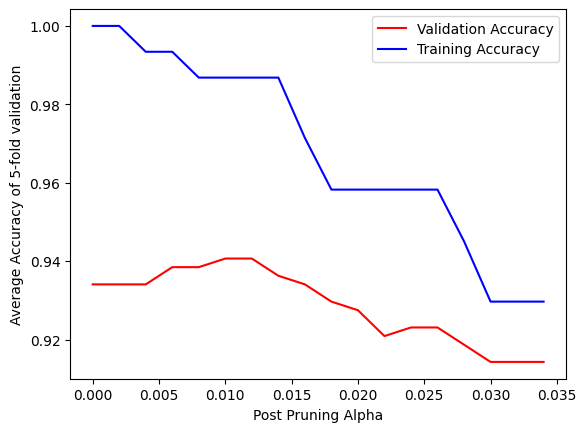

In [69]:
from sklearn.metrics import accuracy_score

# np.arange generates a list that starts at minimum, ends at maximum, and increments by step
alpha_values = np.arange(0, 0.035, 0.002)

# two lists to hold our accuracy
k = 5
valid_accs = []
train_accs = []

# Put your solution here!
# Iterate over all ccp_alpha values
for alpha in alpha_values:
    # Create a decision tree model with the current alpha value
    dt = DecisionTreeClassifier(ccp_alpha=alpha, random_state=random_seed)
    
    # Calculate the k_fold validation accuracy using the k_fold_accuracy function
    k_fold_accs = k_fold_accuracy(k, dt, X_train, Y_train)
    
    # Calculate the training accuracy
    dt.fit(X_train, Y_train)
    train_preds = dt.predict(X_train)
    train_acc = accuracy_score(Y_train, train_preds)
    
    # Store the accuracies
    valid_accs.append(np.mean(k_fold_accs))
    train_accs.append(train_acc)


# Plot both accuracies vs. the ccp_alpha value
plt.plot(alpha_values, valid_accs, color='red', label='Validation Accuracy')
plt.plot(alpha_values, train_accs, color='blue', label='Training Accuracy')
plt.xlabel("Post Pruning Alpha")
plt.ylabel(f'Average Accuracy of {k}-fold validation')
plt.legend()
plt.show()

The following code selects the alpha value for the best model. Then you job is to train a new model (using all of the training data), using your best hyperparameter value. Then evaluate it on the test dataset. What is the accuracy, precision, recall and F1 Score?

In [70]:
# Take the alpha for the model with the best accuracy on the *validation* set!
best_alpha = alpha_values[np.argmax(valid_accs)]
best_alpha

0.01

Accuracy: 0.9386
Precision: 0.9359
Recall: 0.9733
F1 Score: 0.9542


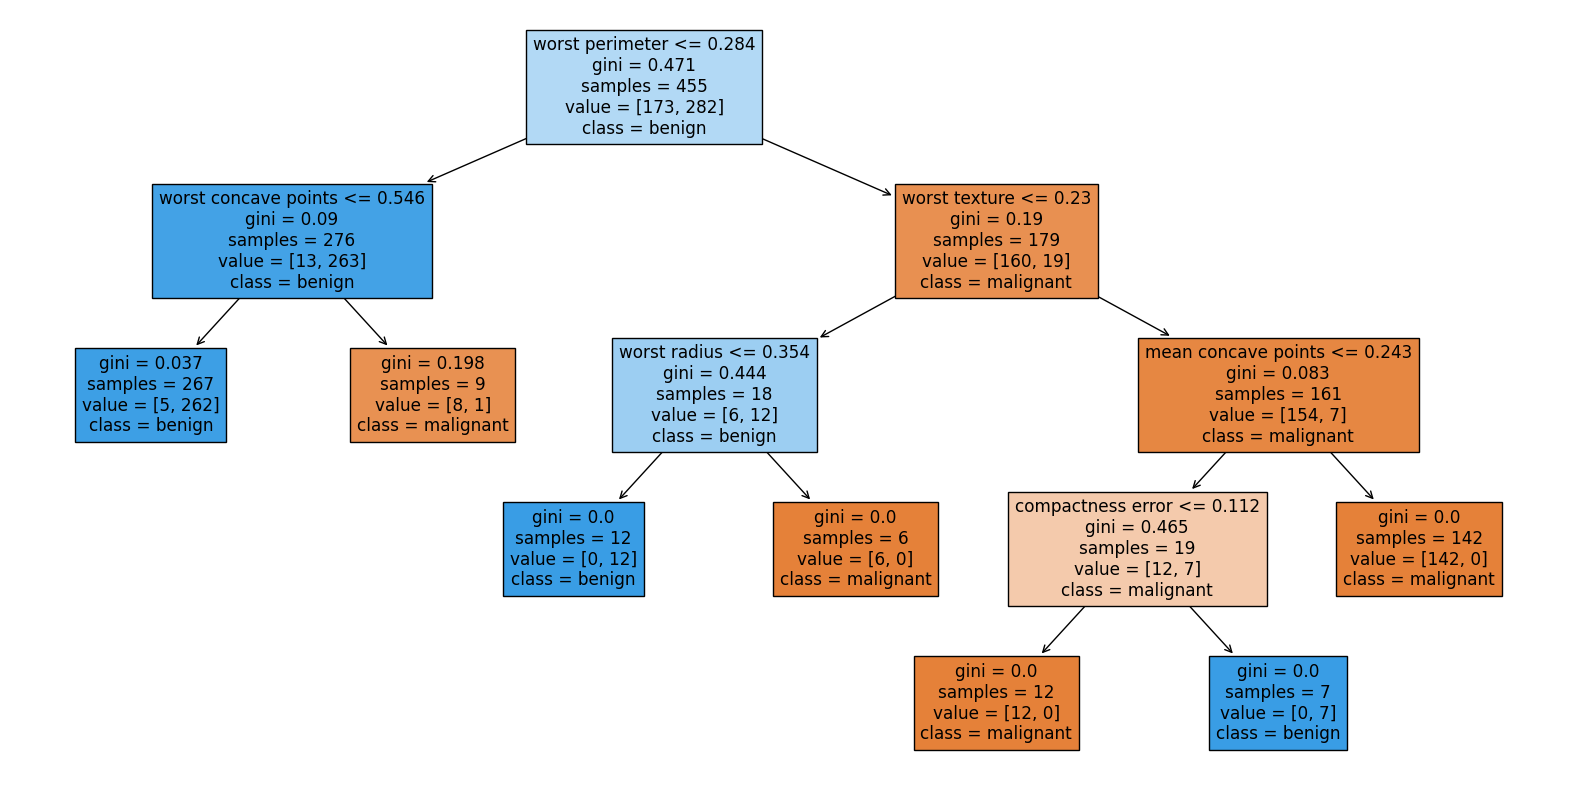

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# Train your model here. You may want to print the tree using plot_tree
# SOLUTION
# Train the model using the best alpha value
best_dt = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=random_seed)
best_dt.fit(X_train, Y_train)

# Make predictions on the test dataset
test_preds = best_dt.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(Y_test, test_preds)
precision = precision_score(Y_test, test_preds)
recall = recall_score(Y_test, test_preds)
f1 = f1_score(Y_test, test_preds)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=bc_sk.feature_names, class_names=bc_sk.target_names)
plt.show()

In [ ]:
# Now evaluate your model on the test dataset - what are the evaluation metrics?
# SOLUTION


# 3) ROC Curves

Sklearn has some built in methods for [plotting ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html).

### 3.1) Plotting ROC Curves (Group)

In [ ]:
# First make an ROC curve for the model you selected with HP tuning
from sklearn.metrics import RocCurveDisplay

gini_tree = DecisionTreeClassifier(criterion = "gini", random_state=random_seed, ccp_alpha=best_alpha).fit(X=X_train.values, y=Y_train.values)
RocCurveDisplay.from_estimator(gini_tree,X_test.values,Y_test.values)

In [ ]:
# Now, make an ROC curve with an AdaBoostClassifier with n_estimators=100

#SOLUTION


In [ ]:
plt.figure(0).clf()

# When predicting, we have to ask for *continuous* values, not 0/1, so we use predict_proba
# We use [:,1] to get the predictions for the positive class
tree_predictions = gini_tree.predict_proba(X_test.values)[:,1]
fpr, tpr, thresh = metrics.roc_curve(Y_test.values, tree_predictions)
auc = metrics.roc_auc_score(Y_test.values, tree_predictions)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

adaboost_predictions = ada.predict_proba(X_test.values)[:,1]
fpr, tpr, thresh = metrics.roc_curve(Y_test.values, adaboost_predictions)
auc = metrics.roc_auc_score(Y_test.values, adaboost_predictions)
plt.plot(fpr,tpr,label="Adaboost, auc="+str(auc))

plt.legend(loc=0)

### 3.2) Intepreting ROC curves (Group)

Take a look at the above ROC curves. How are they similar? How do they differ? Is one strictly better than the other? In what situations is one better than the other? Discuss with your group.

**Take notes of your discussion here.**